# Introduction:
Goal: 
- Using demographic, real estate, and commercial data, this competition challenges you to predict the annual restaurant sales of 100,000 regional locations.
- Data Source
- Kaggle: https://www.kaggle.com/c/restaurant-revenue-prediction/overview
- Data Fields
- Id: Restaurant id.
- Open Date: opening date for a restaurant
- City: City that the restaurant is in. Note that there are unicode in the names.
- City Group: Type of the city. Big cities, or Other.
- Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
- Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values.
- About the company
- TFI has over 1,200 quick service restaurants across the globe.
- They employ over 20,000 people in Europe and Asia.
- They make significant investments in their niche.
- When the wrong location for a restaurant brand is chosen, the site closes within 18 months and operating losses are incurred.
- Their goal is to increase effectiveness in their investments.

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso

In [50]:
data_train = pd.read_csv("train.csv")

In [51]:
data_train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [52]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [53]:
data_train.isna().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [54]:
data_train.City.unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [55]:
len(data_train.City.unique())

34

In [56]:
data_train['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

In [57]:
data_train['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [58]:
data_train['Open Date'] = pd.to_datetime(data_train['Open Date'])

In [59]:
data_train.sort_values(by=['Open Date'], inplace=True, ascending=True, ignore_index=True)

In [60]:
data_train = data_train.drop('Id', axis=1)

In [61]:
data_train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1996-05-08,Adana,Other,IL,4,5.0,4.0,3.0,1,2,...,2.0,4,1,3,3,3,4,3,3,3903884.0
1,1997-04-10,İstanbul,Big Cities,IL,12,7.5,6.0,7.5,2,8,...,2.5,25,15,25,6,18,3,16,6,4286645.0
2,1998-01-28,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,3,...,2.0,3,5,5,2,3,5,4,4,4705945.0
3,1998-03-14,İstanbul,Big Cities,IL,4,5.0,5.0,4.0,1,5,...,3.0,3,2,1,2,2,1,3,3,3784230.0
4,1998-07-13,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,2,8,...,7.5,20,15,25,4,24,15,20,6,2551252.0


In [62]:
data_train['Sale Day'] = data_train['Open Date'].dt.day
data_train['Sale Year'] = data_train['Open Date'].dt.year
data_train['Sale Month'] = data_train['Open Date'].dt.month

In [63]:
data_train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P32,P33,P34,P35,P36,P37,revenue,Sale Day,Sale Year,Sale Month
0,1996-05-08,Adana,Other,IL,4,5.0,4.0,3.0,1,2,...,3,3,3,4,3,3,3903884.0,8,1996,5
1,1997-04-10,İstanbul,Big Cities,IL,12,7.5,6.0,7.5,2,8,...,25,6,18,3,16,6,4286645.0,10,1997,4
2,1998-01-28,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,3,...,5,2,3,5,4,4,4705945.0,28,1998,1
3,1998-03-14,İstanbul,Big Cities,IL,4,5.0,5.0,4.0,1,5,...,1,2,2,1,3,3,3784230.0,14,1998,3
4,1998-07-13,İstanbul,Big Cities,IL,12,7.5,6.0,6.0,2,8,...,25,4,24,15,20,6,2551252.0,13,1998,7


In [64]:
ctg_vars = []

for col in data_train:
    if len(data_train[col].unique()) <= 30:
        ctg_vars.append(col)

In [65]:
i = 1
for k in range(1, 43):
    for p in ctg_vars:
        if p == "P" + str(i):
            ctg_vars.remove("P" + str(i))
            i += 1

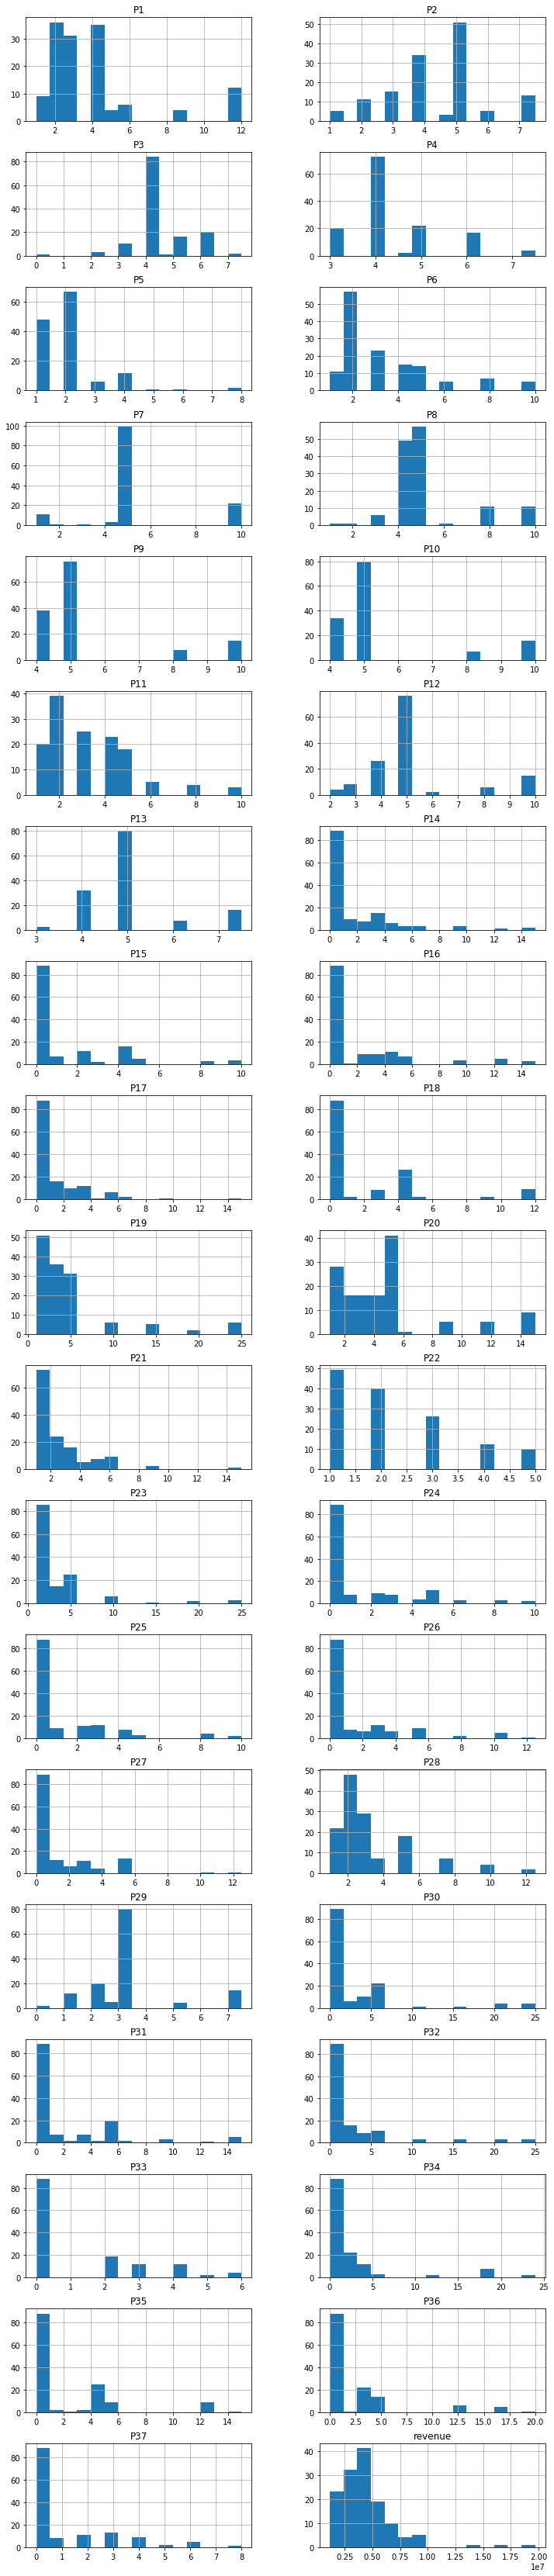

In [66]:
hist_cols = list(data_train.columns[4:42])
data_train[hist_cols].hist(figsize= (12,60), layout=(19,2), bins=15);

In [67]:
rt_median = data_train.groupby('Type')['revenue'].aggregate(np.median)
print("Median Revenue of the types of restaurants per annum: \n", rt_median[1:])

Median Revenue of the types of restaurants per annum: 
 Type
FC    3873650.0
IL    4076087.0
Name: revenue, dtype: float64


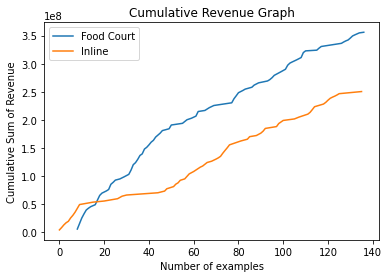

In [68]:
data_train[data_train['Type'] == 'FC']['revenue'].cumsum().plot()
data_train[data_train['Type'] == 'IL']['revenue'].cumsum().plot()
plt.ylabel('Cumulative Sum of Revenue')
plt.xlabel('Number of examples')
plt.legend(['Food Court', 'Inline'])
plt.title('Cumulative Revenue Graph');

In [69]:
imp_train = IterativeImputer(max_iter=30, random_state=0, missing_values=0, sample_posterior = True, min_value=1)
p_vals = ["P" + str(i) for i in range(1, 38)]
data_train[p_vals] = np.round(imp_train.fit_transform(data_train[p_vals]))

In [70]:
data_temp = data_train.copy()
data_temp.drop('Open Date', axis=1, inplace=True)
data_temp.drop('City', axis=1, inplace=True)
data_temp['revenue'] = np.log1p(data_temp['revenue'])
data_temp.to_csv('train_data_modified.csv', index=False)

In [71]:
data = pd.read_csv('train_data_modified.csv')
data = pd.get_dummies(data, columns=ctg_vars)

In [72]:
data['Sale Year_1995'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')
data['Sale Year_2001'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')
data['Sale Year_2003'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')
data['Sale Day_19'] = pd.DataFrame(np.zeros((137, 1)), dtype='uint8')

In [90]:
X = data.drop('revenue', axis=1)
Y = data['revenue']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2,random_state=0)

A random forest regressor. 
- A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [92]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,y_train)
regressor.fit(X_train,y_train)
test_data_prediction = regressor.predict(X_test)
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.15809843012434632


linear regression
- Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data

In [93]:
regressor= LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression()

In [94]:
y_pred= regressor.predict(X_test)

In [95]:
print('Train Score: ', regressor.score(X_train, y_train)) 

Train Score:  0.9351805925971275


Lasso regression
- Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. 

In [96]:
model = Lasso(alpha=1.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Train Score: ', model.score(X_train, y_train))

Train Score:  0.0


# Conclusion:
Hence, accuracy of linear regression is more, we would choose it for building the project.